In [4]:
import pandas as pd
import numpy as np

from context import community_module
from community_module.community_detection.similarityCommunityDetection import SimilarityCommunityDetection
from community_module.community_detection.explainedCommunitiesDetection import ExplainedCommunitiesDetection
from community_module.visualization.gephiVisualization import GephiVisualization

from sklearn.metrics.pairwise import cosine_similarity

In [5]:
interactions_df = pd.read_csv('../../data/IMMA/citizenInteractions.csv')
interactions_df.head()

,userResponseID,artworkID,numInteractions
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,60c0927e0ee8234e932e7a1d,1
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c08c580ee8234e932e7a18,1
2,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c0908cb5b26479a17d1b33,1
3,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c09225b5b26479a17d1b3a,1
4,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c0927e0ee8234e932e7a1d,1


In [6]:
artworks = pd.read_json('../../data/IMMA/artworks_IMMA.json')
artworks

,_id,name,artist,date,description,notes,URL,image,audio,_datasetid,_timestamp,_timestamp_year,_timestamp_month,_timestamp_day,_timestamp_hour,_timestamp_minute,_timestamp_second,_updated
0,60c095321262e65eec197529,Back of Snowman,Gary Hume,2003,Gary Hume was one of a generation of artists w...,"IMMA Collection: Purchase, 2005",https://imma.ie/collection/back-of-snowman/,08GaryHume.jpg,08-BackSnowman-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482702,2021,7,28,15,31,42,True
1,60c094dcb78b241f4625bbb9,SENTINEL VIII,Catherine Lee,1999,"Born in Texas in 1950, Lee’s works are a hybri...","IMMA Collection: Donation, Sean Scully, 2005",https://imma.ie/collection/sentinel-viii/,07CatherineLee.jpg,07-Sentinel-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482652,2021,7,28,15,30,52,True
2,60c09476b84c4b312635d34c,Barrel,Fergus Martin,2020,"This artwork is by Fergus Martin, an Irish art...",Commissioned by the Office for Public Works fo...,,06FergusMartin.jpg,06-Barrel-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482593,2021,7,28,15,29,53,True
3,60c09437b5b26479a17d1b3c,217 5° Arc x 12,Bernar Venet,2008,"Born in 1941 in the south of France, Venet est...","IMMA Collection: Loan, collection of the artis...",https://imma.ie/collection/217-5-arc-x-12/,05BernarVenet.jpg,05-Arc-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482511,2021,7,28,15,28,31,True
4,60c0927e0ee8234e932e7a1d,The Drummer,Barry Flanagan,1996,"Born in Wales, Barry Flanagan studied at Birmi...","IMMA Collection: Donated by the artist, 2001",https://imma.ie/collection/the-drummer/,04BarryFlanagan.jpg,04-Drummer-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482440,2021,7,28,15,27,20,True
5,60c09225b5b26479a17d1b3a,8 Limestones cut to a specific size from rough...,Ulrich Rückriem,1988,Ulrich Rückreim is German and he lives in Colo...,"IMMA Collection: Purchase, 2001",https://imma.ie/collection/8-limestones-cut-to...,03UrichRuckreim.jpg,03-8Limestones-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482394,2021,7,28,15,26,34,True
6,60c0908cb5b26479a17d1b33,Untitled / Corrections D,Iran do Espírito Santo,2008,<p>Brazilian artist Iran do Espírito Santo’s w...,"IMMA Collection: Purchase, 2007",https://imma.ie/collection/untitled-correction...,02IrandoEspiritoSanto.jpg,02-UntitledCorrectionsD-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482302,2021,7,28,15,25,2,True
7,60c08c580ee8234e932e7a18,Recurring Line: North/ South,Donald Urquhart,2007,<p>Scottish artist Donald Urquhart works in a ...,"IMMA Collection: Purchase, 2005",https://imma.ie/collection/recurring-line-nort...,01DonaldUrquhart.jpg,01-RecurringLine-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627481698,2021,7,28,15,14,58,True


In [7]:
def get_name(artwork_id):
    return artworks['_id'] 

names_arts = interactions_df.apply(lambda row: artworks[artworks['_id'] == row['artworkID']].name.values[0], axis=1)

In [8]:
names_arts

0                                           The Drummer
1                          Recurring Line: North/ South
2                              Untitled / Corrections D
3     8 Limestones cut to a specific size from rough...
4                                           The Drummer
5                                       217 5° Arc x 12
6                                                Barrel
7                                         SENTINEL VIII
8                                       Back of Snowman
9                              Untitled / Corrections D
10    8 Limestones cut to a specific size from rough...
11                                          The Drummer
12                                        SENTINEL VIII
13                                          The Drummer
14                                               Barrel
15                                      Back of Snowman
16                         Recurring Line: North/ South
17                             Untitled / Correc

In [9]:
interactions_df['artworkID'] = names_arts

In [10]:
interactions_df

,userResponseID,artworkID,numInteractions
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,The Drummer,1
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Recurring Line: North/ South,1
2,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Untitled / Corrections D,1
3,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,8 Limestones cut to a specific size from rough...,1
4,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,The Drummer,1
5,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,217 5° Arc x 12,1
6,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Barrel,1
7,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,SENTINEL VIII,1
8,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Back of Snowman,1
9,KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,Untitled / Corrections D,3


In [11]:
users_interactions = pd.pivot_table(interactions_df, values='numInteractions', index='userResponseID', columns='artworkID', fill_value=0)
print(users_interactions)

artworkID                         217 5° Arc x 12  \
userResponseID                                      
81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO                0   
BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S                1   
KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I                0   
P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1                0   
SUw10XRrB4A03Ral1MKas4sLgIW9P3lh                0   
ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA                0   
ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F                0   
aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY                1   
iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4                6   
k5SXzdwN9UPY2FXUC1vavDtk3CykTKXR                1   
r6ojHpr4LeGQQcGcSXFGsFQVJzdGYwzE                0   

artworkID                         8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form  \
userResponseID                                                                                                                                   


-ordered labels:
 [ 0  0  0  1  1 -1  2  2  3  3 -1]

-reachability:
 [        inf  1.09963026  1.42692464  1.77859834  1.41443986  4.7213294
  9.82663763  2.50122379 13.62508219  5.91293882         inf]

-core_distances:
 [1.09963026 1.09963026 1.42692464 1.41443986 1.41443986 4.7213294
 2.50122379 2.50122379 5.91293882 5.91293882        inf]

-n_features_in:
 11


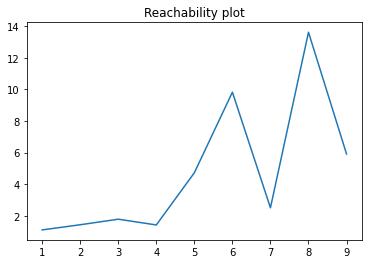

In [148]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt


optics_model = OPTICS(min_samples = 2, min_cluster_size = 2, max_eps = 30)

data = users_interactions
optics_model.fit(data)

print("\n-ordered labels:\n", optics_model.labels_[optics_model.ordering_])
print("\n-reachability:\n", optics_model.reachability_[optics_model.ordering_])
print("\n-core_distances:\n", optics_model.core_distances_[optics_model.ordering_])
print("\n-n_features_in:\n", optics_model.n_features_in_)

# Generate reachability plot
reachability = optics_model.reachability_[optics_model.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

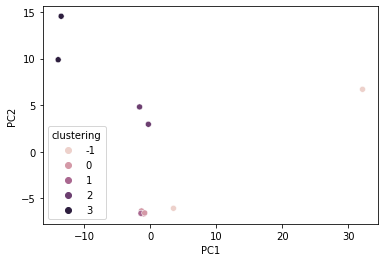

In [147]:
from sklearn.cluster import OPTICS
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

df = data

pca = PCA()
pca.fit(df)
df['PC1'] = pca.fit_transform(df)[:,0]
df['PC2'] = pca.fit_transform(df)[:,1]
df['clustering'] = optics_model.labels_
sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['clustering'])

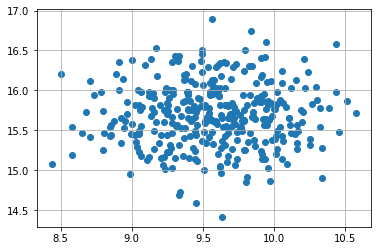

OPTICS()
0.350644848773924
[[ 9.45071447 14.58847433]
 [ 8.500387   16.2113985 ]
 [ 9.56481939 16.89136015]
 [ 9.63176979 14.41548797]
 [ 8.43771706 15.07302741]
 [10.33672675 14.89789167]
 [10.43533425 16.58262441]]


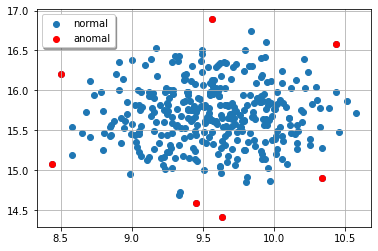

In [58]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(123)
x, _ = make_blobs(n_samples=350, centers=1, cluster_std=.4, center_box=(20, 5))

plt.scatter(x[:,0], x[:,1])
plt.grid(True)
plt.show()

model = OPTICS().fit(x)
print(model)

scores = model.core_distances_

thresh = quantile(scores, .98)
print(thresh)

index = where(scores >= thresh)
values = x[index]
print(values)

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.legend(("normal", "anomal"), loc="best", fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [25]:
community_dectection = ExplainedCommunitiesDetection(users_interactions, SimilarityCommunityDetection, 'cosine')

In [26]:
n_communities, users_communities = community_dectection.search_all_communities(percentage=0.78)

In [27]:
users_interactions['community'] = users_communities.values()
users_interactions.reset_index(inplace=True)

In [28]:
# Pintamos en Gephi
gv = GephiVisualization(workspace='imma')

# Preparamos los datos de usuarios y distancias
users = users_interactions[['userResponseID','community']].values
data = users_interactions.iloc[:,1:-1].values
distances = cosine_similarity(data)

gv.load_community(users, distances, users_properties=['community'])

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [29]:
users_interactions[['userResponseID', 'community']]

artworkID,userResponseID,community
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,2
2,KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,6
3,P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0
4,SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,3
5,ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA,2
6,ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F,5
7,aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY,2
8,iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4,1
9,k5SXzdwN9UPY2FXUC1vavDtk3CykTKXR,1


In [30]:
users_without_community = []
for c in range(n_communities):
    community_data = community_dectection.get_community(c, answer_binary=True)

    if len(community_data['members']) > 1:

        print('---------------------')
        print('COMMUNITY -', community_data['name'])
        print('\t- N. Members:', len(community_data['members']))
        print('\t- Properties:')

        for k in community_data['properties'].keys():
            print('\t\t-', k)
    else:
        users_without_community.extend(community_data['members'])

print('---------------------')
print('N. USERS WITHOUT COMMUNITY -', len(users_without_community))

---------------------
COMMUNITY - 0
	- N. Members: 2
	- Properties:
		- The Drummer
---------------------
COMMUNITY - 1
	- N. Members: 2
	- Properties:
		- 217 5° Arc x 12
		- SENTINEL VIII
---------------------
COMMUNITY - 2
	- N. Members: 3
	- Properties:
		- 8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form
		- Back of Snowman
		- Barrel
		- Recurring Line: North/ South
		- The Drummer
		- Untitled / Corrections D
---------------------
N. USERS WITHOUT COMMUNITY - 4
